<a href="https://colab.research.google.com/github/eldivohno/Tugas2AI/blob/main/fuzzy_logic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
!pip install networkx
!pip install scikit-fuzzy

In [34]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Create the problem variables - automobile
speed = ctrl.Antecedent(np.arange(0, 115, 1), 'speed')
distance = ctrl.Antecedent(np.arange(0, 50, 1), 'distance')
consumption = ctrl.Consequent(np.arange(5, 25, 1), 'consumption')

# Automatically create the mapping between crisp and fuzzy values
# using a default membership function (triangle)
consumption.automf(names=['small', 'medium', 'large'])

# Create the membership functions using different types
speed['low'] = fuzz.trapmf(speed.universe, [0, 0, 15, 30])
speed['mid-low'] = fuzz.trapmf(speed.universe, [15, 30, 45, 60])
speed['mid-high'] = fuzz.trapmf(speed.universe, [45, 60, 75, 90])
speed['high'] = fuzz.trapmf(speed.universe, [75, 90, 105, 105])

distance['near'] = fuzz.trapmf(distance.universe, [0, 0, 5, 15])
distance['mid'] = fuzz.trapmf(distance.universe, [5, 15, 25, 35])
distance['far'] = fuzz.trapmf(distance.universe, [25, 35, 50, 50])


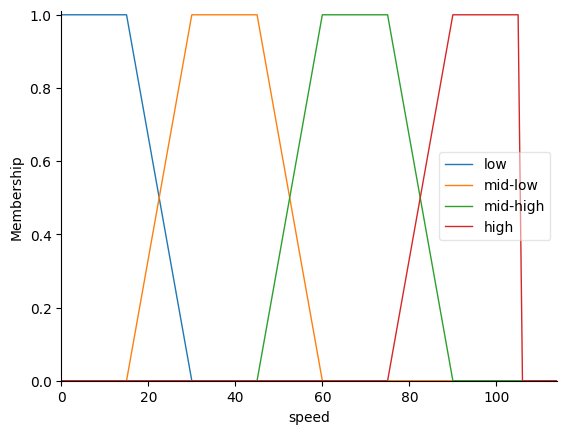

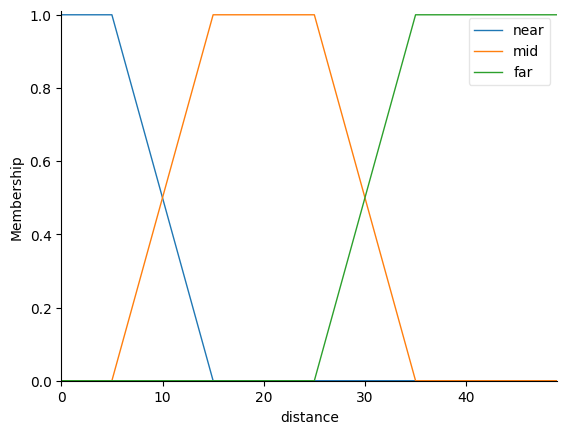

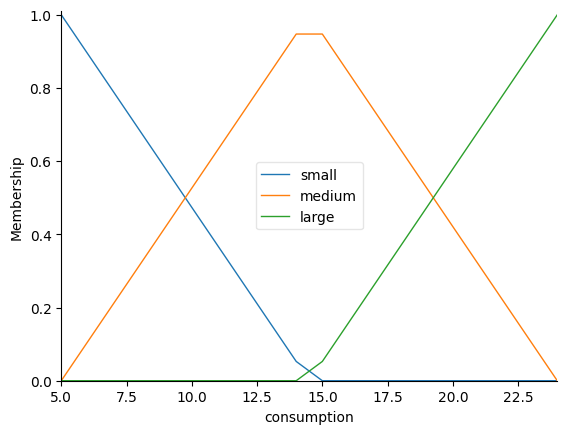

In [35]:
speed.view()
distance.view()
consumption.view()

In [36]:
rule1 = ctrl.Rule(speed['low'] & distance['near'], consumption['small'])
rule2 = ctrl.Rule(speed['low'] & distance['mid'], consumption['small'])
rule3 = ctrl.Rule(speed['low'] & distance['far'], consumption['medium'])
rule4 = ctrl.Rule(speed['mid-low'] & distance['near'], consumption['small'])
rule5 = ctrl.Rule(speed['mid-low'] & distance['mid'], consumption['medium'])
rule6 = ctrl.Rule(speed['mid-low'] & distance['far'], consumption['medium'])
rule7 = ctrl.Rule(speed['mid-high'] & distance['near'], consumption['medium'])
rule8 = ctrl.Rule(speed['mid-high'] & distance['mid'], consumption['large'])
rule9 = ctrl.Rule(speed['mid-high'] & distance['far'], consumption['large'])
rule10 = ctrl.Rule(speed['high'] & distance['near'], consumption['medium'])
rule11 = ctrl.Rule(speed['high'] & distance['near'], consumption['large'])
rule12 = ctrl.Rule(speed['high'] & distance['far'], consumption['large'])


In [42]:
consumption_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])
consumption_simulator = ctrl.ControlSystemSimulation(consumption_ctrl)

# Input values for speed and temperature
consumption_simulator.input['speed'] = 60
consumption_simulator.input['distance'] = 22

# Computed result
consumption_simulator.compute()
print(consumption_simulator.output['consumption'])


20.8158379373849


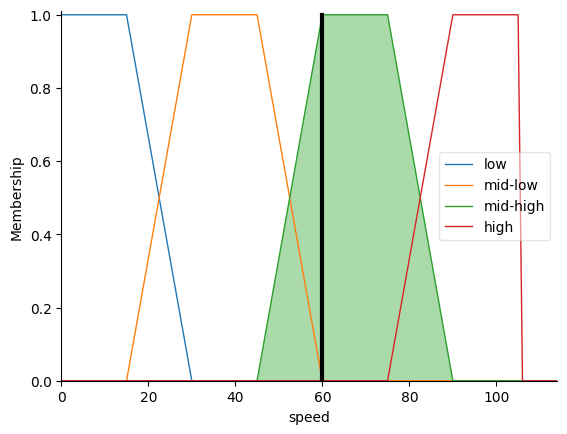

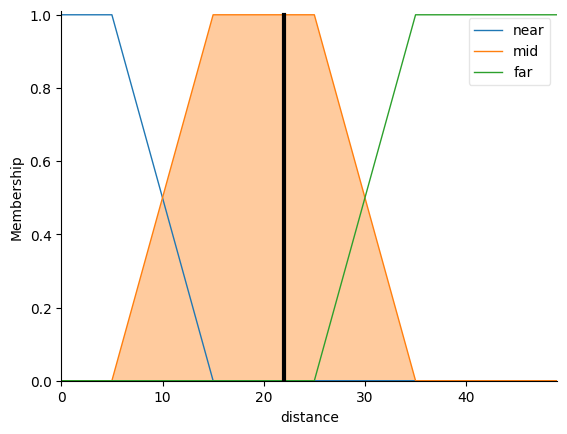

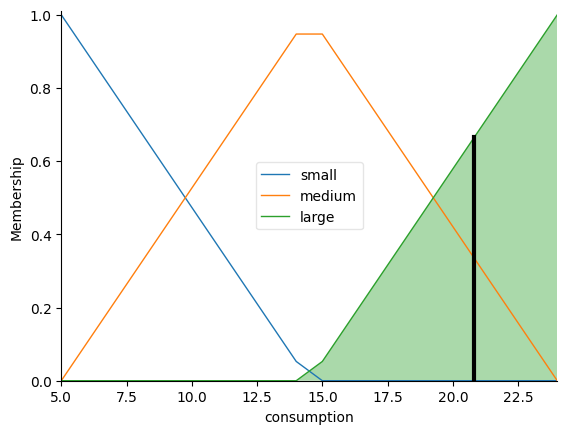

In [43]:
speed.view(sim=consumption_simulator)
distance.view(sim=consumption_simulator)
consumption.view(sim=consumption_simulator)
